In [1]:
# using script provided in assignment for Simpson's rule to perform step 1.2

import math
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    '''Exponential function defined using numpy.'''
    return np.exp(x)

def simpson(fun,a,b,n):
    # Specifications of the Simpson integration procedure
    h = (b-a)/float(n)
    x0 = a
    xn = b
    y0 = fun(x0)
    yn = fun(xn)

    # The weighted average of the integral can be decomposed into sums over odd and even indexes
    feven = 0.0
    fodd = 0.0
    for j in range(2,n,2):
        xeven = a + j*h
        feven += fun(xeven)

        xodd = a +(j-1)*h
        fodd += fun(xodd)

    # range method above yet skips the last odd term 
    xodd = a + (n-1) * h
    fodd += fun(xodd)

    # final weighted average of the simpson integration procedure
    intfun = h*(y0 + 2.0*feven + 4.0*fodd + yn)/3.0
    
    return intfun

# # Specifications to be passed to the Simpson procedure
a = 0.0
b = 1.0
# utilizing an initial number of steps of 100
n = 100

# Numerical integration of function using Simpson procedure
I = simpson(f,a,b,n)

# Analytical solution of the integral of exp(x) integrated from 0 up to 1.
Ia = math.exp(1.0) - 1.0


print('Numerical solution, analytical solution, absolute error')
print(I, Ia, abs(I-Ia))

Numerical solution, analytical solution, absolute error
1.7182818285545043 1.718281828459045 9.545919610332021e-11


In [2]:
# preforming numerical integration for new initial parameters 
# # Specifications to be passed to the Simpson procedure
a = 0.0
b = 1.0
# utilizing an new number of steps of 50 
n = 50

# Numerical integration of function using Simpson procedure
I = simpson(f,a,b,n)

# Analytical solution of the integral of exp(x) integrated from 0 up to 1.
Ia = math.exp(1.0) - 1.0


print('Numerical solution, analytical solution, absolute error')
print(I, Ia, abs(I-Ia))

Numerical solution, analytical solution, absolute error
1.718281829986334 1.718281828459045 1.527288961966633e-09


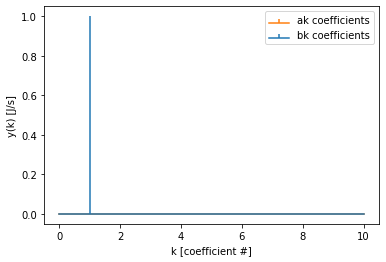

In [3]:
# writing script to compute the Fourier coefficients ak and bk for the function f(t)=sin(wt)

import math
import numpy as np
import matplotlib.pyplot as plt

# defining function f(t)
def f(t, w):
    '''defining Fourier Series f(t) defined in step 1.2 (b)'''
    return math.sin(w*t)

# defining function which computes the integrand of the ak coefficients in equation (6)
def integrand_a(t, k, w):
    '''defining integrand according to equation (5)/(6) using math module.'''
    return f(t, w)*math.cos(k*w*t)

# defining function which computes the integrand of the bk coefficients in equation (7)
def integrand_b(t, k, w):
    '''defining integrand according to equation (7) using math module.'''
    return f(t, w)*math.sin(k*w*t)

# utilizing the previously obtain Simpson rule function as template...
# ... with slight modifications to account for new integrand function (previously was f(x) = e^x) 
def simpson(fun,t0,T,n, k, w):
    # Specifications of the Simpson integration procedure
    h = (T-t0)/float(n)
    tn = T
    y0 = fun(t0, k, w)
    yn = fun(tn, k, w)

    # The weighted average of the integral can be decomposed into sums over odd and even indexes
    feven = 0.0
    fodd = 0.0
    for j in range(2,n,2):
        teven = t0 + j*h
        feven += fun(teven, k, w)

        todd = t0 +(j-1)*h
        fodd += fun(todd, k, w)

    # range method above yet skips the last odd term 
    todd = t0 + (n-1) * h
    fodd += fun(todd, k, w)

    # final weighted average of the simpson integration procedure
    intfun = h*(y0 + 2.0*feven + 4.0*fodd + yn)/3.0
    
    return intfun

# defining master function to compute and plot coefficients (easily re-used for different f(t) functions)

def master():
    # Specifications to be passed to the Simpson procedure
    w = 1.0
    t0 = 0.0
    T = (2*math.pi)/w
    n = 100


    # creating lists for ak and bk coefficients to be plotted latter
    AK = []
    BK = [0]

    # iterating through coefficient indices k to compute ak's
    for k in range(11):
        # Numerical integration of function using Simpson procedure
        I = simpson(integrand_a,t0,T,n, k, w)
        # determining whether k = 0, in which case equation (5) from manual is executed  
        if k == 0:
            a0 = (1/T)*I
            # appending coefficient to it's designated list
            AK.append(a0)        
        # if coefficient does not correspond to a0 then computing coefficients according to equation (6) in manual    
        else:
            ak = (2/T)*I
            # appending coefficient to it's designated list
            AK.append(ak)

    # iterating through coefficient indices k to compute bk's
    for k in range(1, 11, 1):
        # Numerical integration of function using Simpson procedure
        I = simpson(integrand_b,t0,T,n, k, w)
        bk = (2/T)*I
        # appending coefficient to it's designated list    
        BK.append(bk)

    # plotting ak and bk as function of k 
    plt.figure()
    plt.xlabel('k [coefficient #]')
    plt.ylabel('y(k) [J/s]')
    plt.stem(np.arange(0,11,1), AK, label='ak coefficients', markerfmt=' ', basefmt='C1', linefmt='C1')
    plt.stem(np.arange(0,11,1), BK, label='bk coefficients', markerfmt=' ', basefmt='C0', linefmt='C0')
    plt.legend()

# calling master function to compute and plot Fourier coefficients 
master()

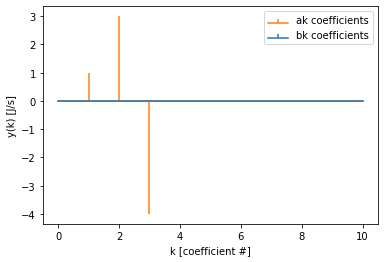

In [4]:
# using previously defined script to compute coefficients of new f(t) function
# namely, f(t) = cos(wt)+3cos(2wt)-4cos(3wt) 

import math
import numpy as np
import matplotlib.pyplot as plt

# defining new f(t) function
def f(t, w):
    '''defining Fourier Series f(t) defined in step 1.2 (b)'''
    return math.cos(w*t)+3*math.cos(2*w*t)-4*math.cos(3*w*t)

# calling master function with newly defined function f(t)
master()

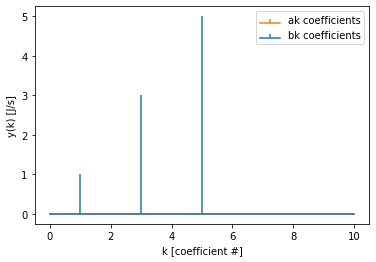

In [5]:
# using previously defined script to compute coefficients of new f(t)
# namely, f(t) = sin(wt)+3sin(3wt)+5sin(5wt) 

import math
import numpy as np
import matplotlib.pyplot as plt

# defining new f(t) function
def f(t, w):
    '''defining Fourier Series f(t) defined in step 1.2 (b)'''
    return math.sin(w*t)+3*math.sin(3*w*t)+5*math.sin(5*w*t)

# calling master function with newly defined function f(t)
master()

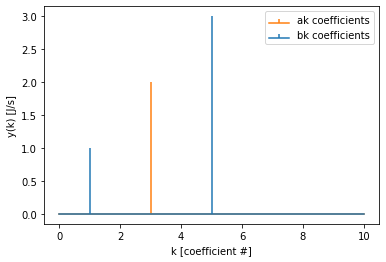

In [6]:
# using previously defined script to compute coefficients of new f(t)
# namely, f(t) = sin(wt)+2cos(3wt)+3sin(5wt) 

import math
import numpy as np
import matplotlib.pyplot as plt

# defining new f(t) function
def f(t, w):
    '''defining Fourier Series f(t) defined in step 1.2 (b)'''
    return math.sin(w*t)+2*math.cos(3*w*t)+3*math.sin(5*w*t)

# calling master function with newly defined function f(t)
master()

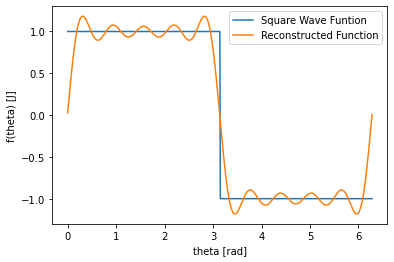

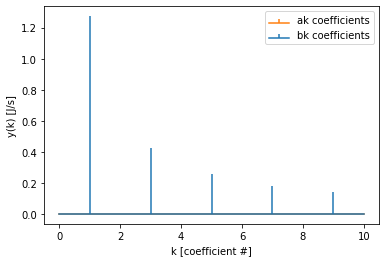

In [7]:
# writing script to find the coefficient of a square wave as defined in step 1.2 c)

# importing relevant functions
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# defining square wave function
def f(theta, w):
    '''defining Fourier Series f(theta) according to step 1.2 (c)'''
    return signal.square(theta, duty = 1/alpha)

# utilizing the previously obtain Simpson rule function as template...
# ... with slight modifications to account for new integrand function (new f(t)) 
def simpson(fun,theta_0,theta_n, n, k, w):
    # Specifications of the Simpson integration procedure
    h = (theta_n - theta_0)/float(n)
    y0 = fun(theta_0, k, w)
    yn = fun(theta_n, k, w)

    # The weighted average of the integral can be decomposed into sums over odd and even indexes
    feven = 0.0
    fodd = 0.0
    for j in range(2,n,2):
        theta_even = theta_0 + j*h
        feven += fun(theta_even, k, w)

        theta_odd = theta_0 +(j-1)*h
        fodd += fun(theta_odd, k, w)

    # range method above yet skips the last odd term 
    theta_odd = theta_0 + (n-1) * h
    fodd += fun(theta_odd, k, w)

    # final weighted average of the simpson integration procedure
    intfun = h*(y0 + 2.0*feven + 4.0*fodd + yn)/3.0
    
    return intfun

# defining master function to compute the Fourier coefficients up to specified k_max and plot reconstructed signal
def master(k_max):
    # Specifications to be passed to the Simpson procedure
    theta_0 = 0.0
    theta_n = 2*math.pi
    n = 500
    w = 1

    # creating lists for ak and bk coefficients to be plotted latter
    AK = []
    BK = [0]

    # iterating through coefficient indices k to compute ak's
    for k in range(k_max+1):
        # Numerical integration of function using Simpson procedure
        I = simpson(integrand_a, theta_0, theta_n, n, k, w)
        # determining whether k = 0, in which case equation (5) from manual is executed with slight alteration...
        # namely the period T is replaced by 2pi
        if k == 0:
            a0 = (1/(2*math.pi))*I
            # appending coefficient to it's designated list
            AK.append(a0)   
        # if coefficient does not correspond to a0 then computing coefficients according to equation (6) in manual...
        # ... with aforementioned alteration     
        else:
            ak = (2/(2*math.pi))*I
            # appending coefficient to it's designated list
            AK.append(ak)

    for k in range(1, k_max+1, 1):
        # Numerical integration of function using Simpson procedure
        I = simpson(integrand_b, theta_0, theta_n, n, k, w)
        bk = (2/(2*math.pi))*I
        # appending coefficient to it's designated list
        BK.append(bk)
    
    # defining reconstructed function f(theta) which uses the previously calculated coefficients
    def f_reconst(theta, k_max): 
        # initializing function value to zero and the indice n of the sum within the function to zero
        n = 0
        fun = 0
        # iterating through previously calculated coefficients to compute functions value for the specified theta which was passed in
        for i in range(k_max+1):
            # updating function value by adding term at given index n
            fun += AK[i]*math.cos(n*theta) + BK[i]*math.sin(n*theta)
            # incrementing n
            n += 1
        # returning reconstructed function value at specified theta
        return fun

    # creating list of theta's for which to compute f_reconst(theta) 
    theta = np.arange(0, 2*math.pi, 0.01)
    

    # creating list to store computed values of f_reconst(theta)
    F_reconst = []

    # iterating through angles and computing reconstructed Fourier series
    for angle in theta:
        result = f_reconst(angle, k_max)
        # appending reconstructed Fourier series output for given angle into it's designated list
        F_reconst.append(result)

    # obtaining true signal
    # creating list to append true signal values from square wave into 
    F = []

    # iterating through angular domain defined in list 'theta'
    for angle in theta:
        # computing square wave value at given angle
        result = signal.square(angle, duty = (1/alpha))
        # appending signal into it's designated list
        F.append(result)

    # plotting reconstructed function using k_max number of coefficients and superimposing plot onto true signal
    # plotting instructions
    plt.figure()
    plt.xlabel('theta [rad]')
    plt.ylabel('f(theta) [J]')
    plt.plot(theta, F, label="Square Wave Funtion")
    plt.plot(theta, F_reconst, label="Reconstructed Function")
    plt.legend()

    # plotting ak and bk as function of k 
    # plotting instructions
    plt.figure()
    plt.xlabel('k [coefficient #]')
    plt.ylabel('y(k) [J/s]')
    plt.stem(np.arange(0,k_max+1,1), AK, label='ak coefficients', markerfmt=' ', basefmt='C1', linefmt='C1')
    plt.stem(np.arange(0,k_max+1,1), BK, label='bk coefficients', markerfmt=' ', basefmt='C0', linefmt='C0')
    plt.legend()


# calling master function to plot reconstructed square wave
# setting number of coefficients to compute as well as alpha parameter
# for step 1.2 c) alpha is not employed and as such alpha = 2 will not create any asymetries  
k_max = 10
alpha = 2

master(k_max)

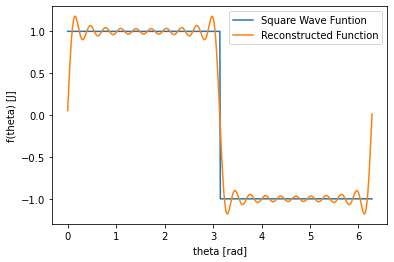

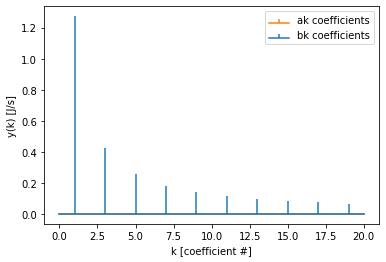

In [8]:
# plotting reconstructed square wave signal using 20 coefficients

# importing relevant function
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


# calling master function to plot reconstructed square wave
# setting number of coefficients to compute as well as alpha parameter
# for step 1.2 c) alpha is not employed and as such alpha = 2 will not create any asymetries  
k_max = 20
alpha = 2

master(k_max)

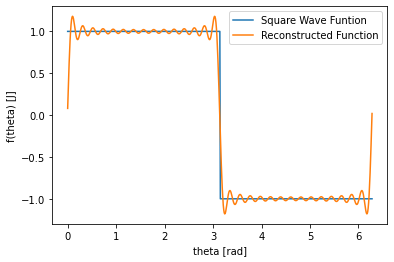

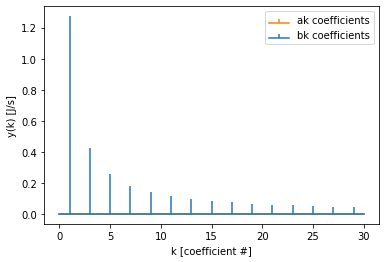

In [9]:
# plotting reconstructed square wave signal using 20 coefficients

# importing relevant function
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


# calling master function to plot reconstructed square wave
# setting number of coefficients to compute as well as alpha parameter
# for step 1.2 c) alpha is not employed and as such alpha = 2 will not create any asymetries  
k_max = 30
alpha = 2

master(k_max)

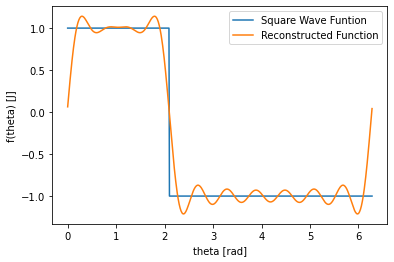

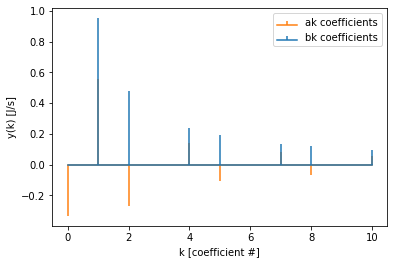

In [10]:
# writing script to find the coefficient of a square wave as defined in step 1.2 d)... using 10 coefficients

# importing relevant functions
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# defining square wave function
def f(theta, w):
    '''defining Fourier Series f(theta) according to step 1.2 (d)'''
    return signal.square(theta, duty = 1/3)

# calling master function to plot reconstructed square wave
# setting number of coefficients to compute as well as alpha parameter for asymetry  
k_max = 10
alpha = 3

master(k_max)

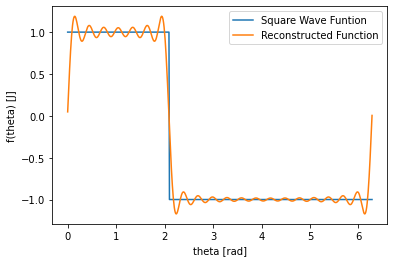

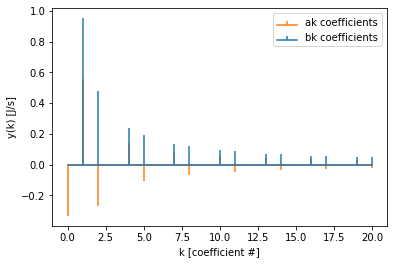

In [11]:
# plotting reconstructed square wave signal using 20 coefficients

# importing relevant function
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


# calling master function to plot reconstructed square wave
# setting number of coefficients to compute as well as alpha parameter for asymetry 
k_max = 20
alpha = 3

master(k_max)

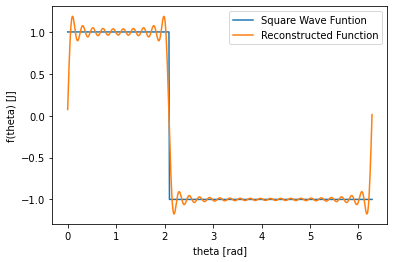

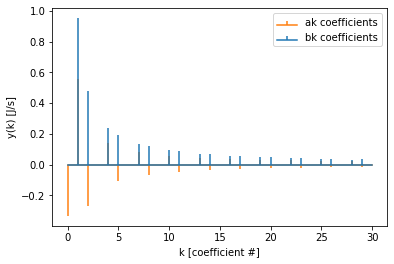

In [12]:
# plotting reconstructed square wave signal using 30 coefficients

# importing relevant function
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


# calling master function to plot reconstructed square wave
# setting number of coefficients to compute as well as alpha parameter for asymetry  
k_max = 30
alpha = 3

master(k_max)

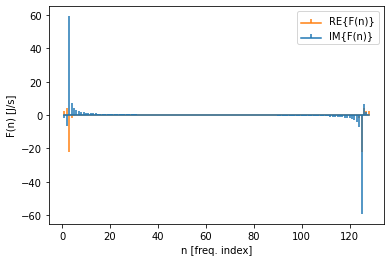

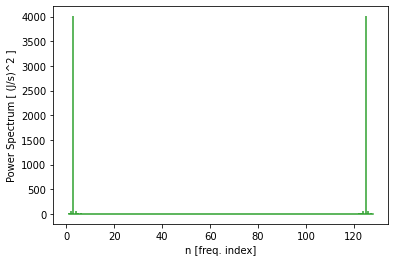

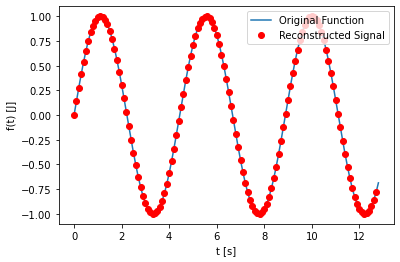

In [27]:
# writing script to analyze the discrete Fourier transform [ step 2.a) ] 
# importing relevant functions

import math
import numpy as np
import matplotlib.pyplot as plt

# defining function f(t) 
def f(m, h):
    '''Defining function specified in step 2.2 (a)'''
    return math.sin(0.45*math.pi*m*h)

# defining real Fourier coefficient function 
def RE(n, N, h, m_indices):
    '''defining coefficient function according to equation (24) in assignment manual'''
    fun = 0
    for m in m_indices:
        fun += f(m, h) * math.cos( (2*math.pi*m*n) / N )
    # returning real coefficient value at the specified frequency index n
    return fun

# defining imaginary Fourier coefficient function 
def IM(n, N, h, m_indices):
    '''defining coefficient function according to equation (25) in assignment manual'''
    fun = 0
    for m in m_indices:
        fun += f(m, h) * math.sin( (2*math.pi*m*n) / N )
    # returning imaginary coefficient value at the specified frequency index n
    return fun

# defining reconstructed Fourier series f(t) function 
def f_DFT(m, N, h, n_indices, RE_list, IM_list, P):
    '''defining reconstructed Fourier series according to equation (26) in the assignment manual'''
    # initializing sum value to zero
    f = 0.0
    # summing over frequency spectrum
    for n in n_indices:
        # indexing through previously defined Fourier coefficient lists in order to compute the summand from equation (26) 
        f += RE_list[(n-1)]*math.cos( (2*math.pi*m*n)/N ) + IM_list[(n-1)]*math.sin( (2*math.pi*m*n)/N )
    f = (1/N) * f
    # returning reconstructed Fourier series value at designated time (m index)
    return f

# creating master function to compute/plot Fourier coefficients, compute/plot reconstructed Fourier series and...
# ... compute/plot power spectrum
def master1(N, h, step, f, RE, IM, f_DFT):
    # creating m indices list (effectively timeline)
    m_indices = np.arange(0, N, 1)

    # creating seperate timeline for continuous 'true' signal with smaller spacing to improve continuity of graph 
    timeline = np.arange(0, N, 0.01)

    # creating list to store value of f(t) in
    F = []

    # if code is being run for step 2.a) then utilizing smaller discretized timeline to compute and plot true signal
    if step == '2.a)':
        # computing values of f(t) correpsonding to timeline domain
        for t in timeline:
            result = f(t, h)
            # appending f(t) value for given m index (time) into designated list
            F.append(result)

    # otherwise if code is being run for step 2.b) where signal is given for arbitrary time steps then execctuting the following   
    else:
        for m in m_indices:
            result = f(m, h)
            # appending f(t) value for given m index (time) into designated list
            F.append(result)

    # computing the Fourier components (coefficients) for the DFT
    # creating list of n frequency values pertaining to frequency spectrum 
    n_indices = np.arange(1, (N+1), 1)

    # creating list to store values for Fourier real and imaginary components
    RE_list = []
    IM_list = []

    # iterating through frequency indices and computing real (RE) and imaginary (IM) components 
    for elem in n_indices:
        re = RE(elem, N, h, m_indices)
        im = IM(elem, N, h, m_indices)

        # appending Fourier components to respective lists 
        RE_list.append(re)
        IM_list.append(im)
    
    # creating power spectrum list from Fourier coefficients 
    P = []

    # iterating through frequency spectrum to compute power spectrum 
    for i in range(len(n_indices)):
        # indexing through coefficient lists to compute the power at a given frequency (n index)
        p = (RE_list[i] * RE_list[i]) + (IM_list[i] * IM_list[i])
        # appending power spectrum value to it's designated list
        P.append(p)

    # now obtaining reconstructed Fourier series values f(t) over designated time interval (m indices) 
    # creating list to store values of reconstructed Fourier serie values 
    F_DFT = []

    # iterating through list of m indices (effectively time) to compute reconstructed Fourier series
    for m in m_indices:
        result = f_DFT(m, N, h, n_indices, RE_list, IM_list, P)
        # appending calculated Fourier series value to designated list
        F_DFT.append(result)

    # plotting Fourier coefficients as function of frequency index
    # plotting instructions
    plt.figure()
    plt.xlabel('n [freq. index]')
    plt.ylabel('F(n) [J/s]')
    plt.stem(n_indices, RE_list, label='RE{F(n)}', markerfmt=' ', basefmt='C1', linefmt='C1')
    plt.stem(n_indices, IM_list, label='IM{F(n)}', markerfmt=' ', basefmt='C0', linefmt='C0')
    plt.legend()

    # distinguishing between plotting instruction for 2.a) and 2.b) 
    if step == '2.a)':
        # plotting power spectrum of signal as function of frequency index
        # plotting instructions
        plt.figure()
        plt.xlabel('n [freq. index]')
        plt.ylabel('Power Spectrum [ (J/s)^2 ]')
        plt.stem(n_indices, P, label='Power Spectrum', markerfmt=' ', basefmt='C2', linefmt='C2')
        
        # plotting reconstructed and original Fourier series as functions of time (m_indice * h)
        # plotting instructions
        plt.figure()
        plt.xlabel('t [s]')
        plt.ylabel('f(t) [J]')
        plt.plot(timeline*h, F, label="Original Function")
        plt.plot(m_indices*h, F_DFT, 'o', color = 'red', label="Reconstructed Signal")
        plt.legend(loc="upper right")

    
    elif step == '2.b)':
        # plotting power spectrum of signal as function of frequency index
        # plotting instructions
        plt.figure()
        plt.xlabel('n [freq. index]')
        plt.ylabel('Power Spectrum [ (J/s)^2 ]')
        plt.stem(n_indices, P, label='Power Spectrum', markerfmt=' ', basefmt='C2', linefmt='C2')
        plt.xlim(0, N/10)
        
        # plotting reconstructed Fourier series as functions of time (m_indice * h)
        # plotting instructions
        plt.figure()
        plt.xlabel('t [s]')
        plt.ylabel('f(t) [J]')
        plt.plot(m_indices*h, F, label="Original Function")
        plt.plot(m_indices*h, F_DFT, linewidth = 3, color = 'red', label="Reconstructed Signal")
        plt.legend(loc="upper right")

# defining relevant paramters needed for the timeline and the master function as a whole
N = 128
h = 0.1

# calling master function to compute/plot Fourier coefficients, compute/plot reconstructed Fourier series and...
# ... compute/plot power spectrum

master1(N, h, '2.a)', f, RE, IM, f_DFT)

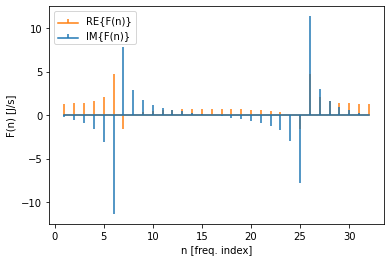

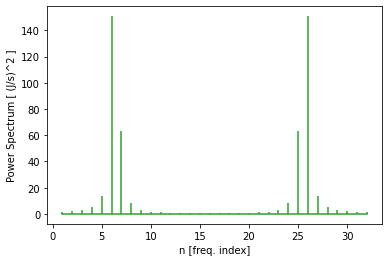

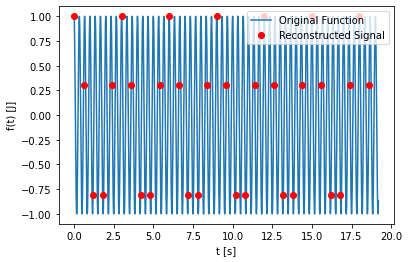

In [28]:
# analyzing the discrete Fourier transform for new function f(t) [ step 2.a) ] 
# importing relevant functions

import math
import numpy as np
import matplotlib.pyplot as plt

# defining the new function f(t) 
def f(m, h):
    '''Defining function specified in step 2.2 (a) part 5'''
    return math.cos(6*math.pi*m*h)

# defining new relevant paramters needed for the timeline and the master function as a whole
N = 32
h = 0.6

# calling master function to compute/plot Fourier coefficients, compute/plot reconstructed Fourier series and...
# ... compute/plot power spectrum

master1(N, h, '2.a)', f, RE, IM, f_DFT)

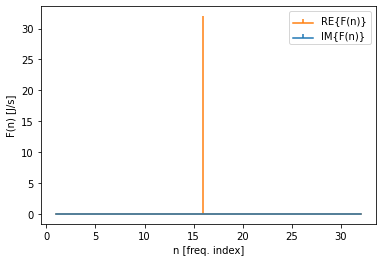

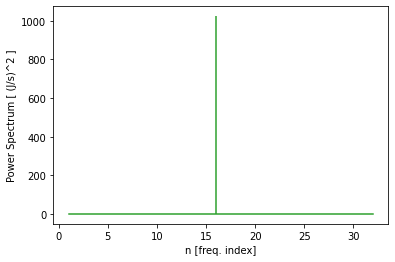

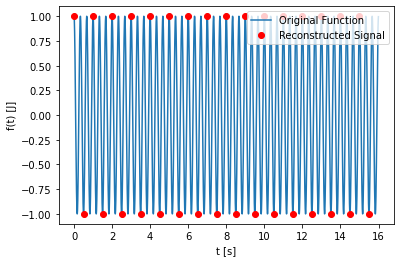

In [29]:
# analyzing the discrete Fourier transform for previously defined f(t) but with new parameters N and h [ step 2.a) ] 
# importing relevant functions

import math
import numpy as np
import matplotlib.pyplot as plt

# defining new relevant paramters needed for the timeline and the master function as a whole
N = 32
h = 0.50

# calling master function to compute/plot Fourier coefficients, compute/plot reconstructed Fourier series and...
# ... compute/plot power spectrum

master1(N, h, '2.a)', f, RE, IM, f_DFT)

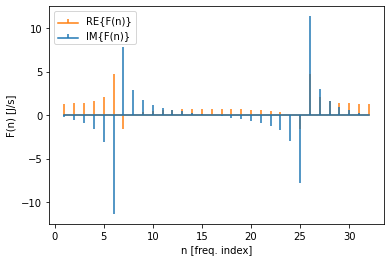

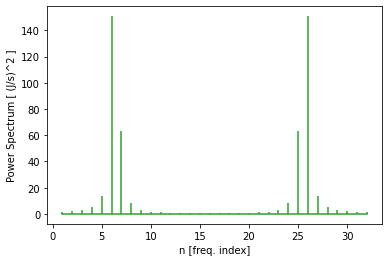

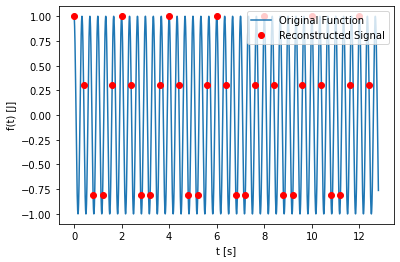

In [30]:
# analyzing the discrete Fourier transform for previously defined f(t) but with new parameters N and h [ step 2.a) ] 
# importing relevant functions

import math
import numpy as np
import matplotlib.pyplot as plt

# defining new relevant paramters needed for the timeline and the master function as a whole
N = 32
h = 0.40

# calling master function to compute/plot Fourier coefficients, compute/plot reconstructed Fourier series and...
# ... compute/plot power spectrum

master1(N, h, '2.a)', f, RE, IM, f_DFT)

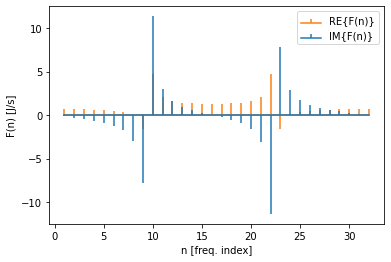

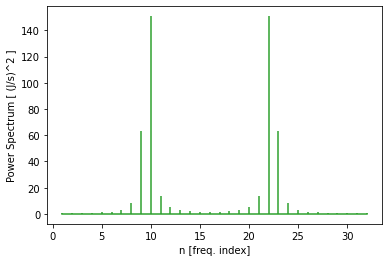

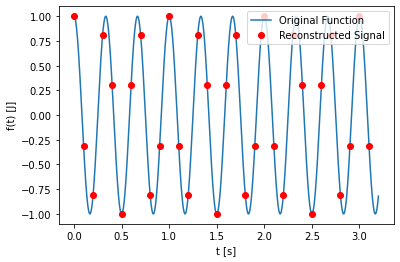

In [31]:
# analyzing the discrete Fourier transform for previously defined f(t) but with new parameters N and h [ step 2.a) ] 
# importing relevant functions

import math
import numpy as np
import matplotlib.pyplot as plt

# defining new relevant paramters needed for the timeline and the master function as a whole
N = 32
h = 0.1

# calling master function to compute/plot Fourier coefficients, compute/plot reconstructed Fourier series and...
# ... compute/plot power spectrum

master1(N, h, '2.a)', f, RE, IM, f_DFT)

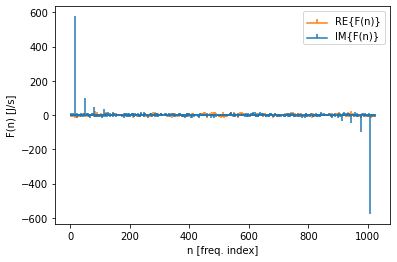

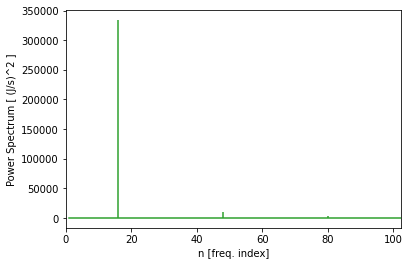

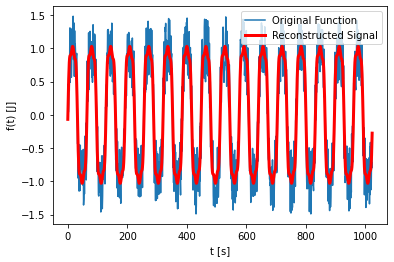

In [32]:
# writing script to analyze the discrete Fourier transform [ step 2.b) ] 
# importing relevant functions

import math
import numpy as np
import matplotlib.pyplot as plt

# reading in signal from text file: pitch.txt
# creating list in which to store signal
pitch_list = []

# creating file object 'pitch' and opening for reading
pitch = open('pitch.txt', 'r')

# iterating through lines in file object and appending them into aforementioned list 
for line in pitch:
    pitch_list.append(float(line))
pitch.close()

# defining function f(t)
def f(m, h):
    ''' Function takes index value m, corresponding to particular time and returns pitch at given index '''
    return pitch_list[m]

# defining new reconstructed Fourier series function which will 'denoise' the signal 
def f_DFT(m, N, h, n_indices, RE_list, IM_list, P):
    '''defining reconstructed Fourier series according to equation (26) in the assignment manual'''
    # initializing sum value to zero
    f = 0.0
    # conditionally summing over frequency spectrum
    for n in n_indices:
        # obtaining power at given frequency by indexing through power spectrum list
        power = ( P[(n-1)] )**(1/2)
        # ensuring that the power at given frequency is greater then the threshold value of epsilon
        if power > epsilon:
            # computing summand according to equation (26) in the assignment manual
            f += RE_list[(n-1)]*math.cos( (2*math.pi*m*n)/N ) + IM_list[(n-1)]*math.sin( (2*math.pi*m*n)/N )
    f = (1/N) * f
    # returning reconstructed Fourier series value at designated time (m index)
    return f

# defining new relevant paramters needed for the timeline and the master function as a whole
N = len(pitch_list)
epsilon = 50

# specifying irrelevant parameter needed due to the nature of predefined master1 function
h = 1

# calling master function to compute/plot Fourier coefficients, compute/plot reconstructed Fourier series and...
# ... compute/plot power spectrum

master1(N, h, '2.b)', f, RE, IM, f_DFT)